# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
  
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
    

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    response = requests.get(city_url).json()
   
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response['main']['temp']

        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | celestun
Processing Record 2 of Set 1 | polis
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | banjar
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | ismailia
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | kenora
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | inverell
Processing Record 18 of Set 1 | krasnoselkup
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | lincoln
Processing Record 23 of

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df
# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,celestun,20.8667,-90.4000,21.36,85,4,3.90,MX,1675589589
1,polis,35.0367,32.4264,14.90,74,99,4.39,CY,1675589590
2,hithadhoo,-0.6000,73.0833,27.01,70,96,5.26,MV,1675589591
3,ushuaia,-54.8000,-68.3000,8.81,61,75,3.09,AR,1675589311
4,bethel,41.3712,-73.4140,-0.25,65,0,1.54,US,1675589320


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,celestun,20.8667,-90.4000,21.36,85,4,3.90,MX,1675589589
1,polis,35.0367,32.4264,14.90,74,99,4.39,CY,1675589590
2,hithadhoo,-0.6000,73.0833,27.01,70,96,5.26,MV,1675589591
3,ushuaia,-54.8000,-68.3000,8.81,61,75,3.09,AR,1675589311
4,bethel,41.3712,-73.4140,-0.25,65,0,1.54,US,1675589320


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

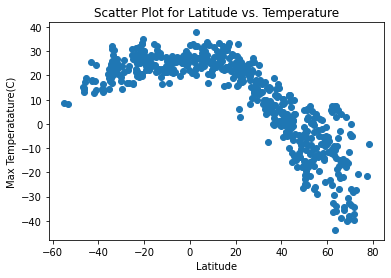

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperatature(C)')
plt.title('Scatter Plot for Latitude vs. Temperature')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

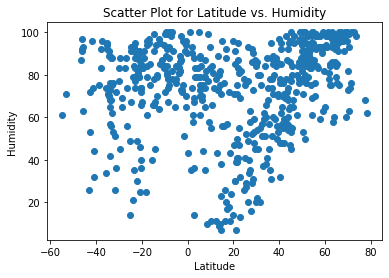

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Scatter Plot for Latitude vs. Humidity')
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

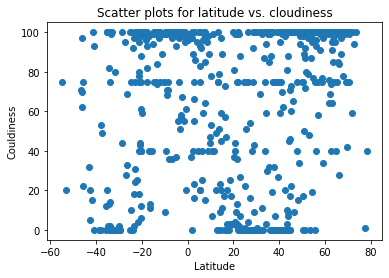

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Couldiness')
plt.title('Scatter plots for latitude vs. cloudiness')
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

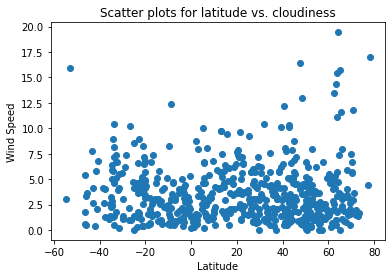

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Scatter plots for latitude vs. cloudiness')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


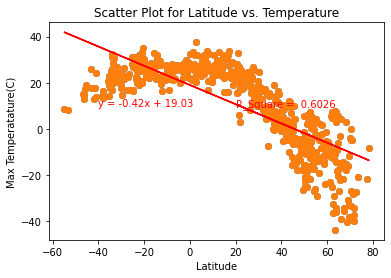

In [24]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

rsquare = (f'R_Square =  {str(round(rvalue**2,4))}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq, xy=(-40,10), color= 'red')
plt.annotate(rsquare, xy = (20,10), color = 'red')
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperatature(C)')
plt.title('Scatter Plot for Latitude vs. Temperature')
plt.show()

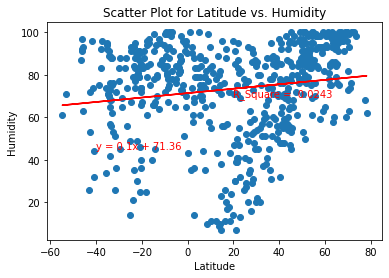

In [25]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

rsquare = (f'R_Square =  {str(round(rvalue**2,4))}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq, xy=(-40,45), color= 'red')
plt.annotate(rsquare, xy = (20,70), color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Scatter Plot for Latitude vs. Humidity')
plt.show()

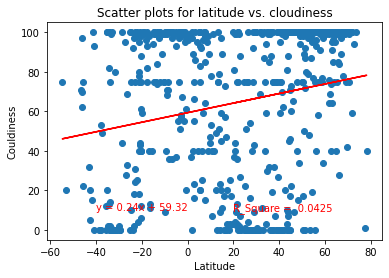

In [26]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

rsquare = (f'R_Square =  {str(round(rvalue**2,4))}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq, xy=(-40,10), color= 'red')
plt.annotate(rsquare, xy = (20,10), color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Couldiness')
plt.title('Scatter plots for latitude vs. cloudiness')
plt.show()

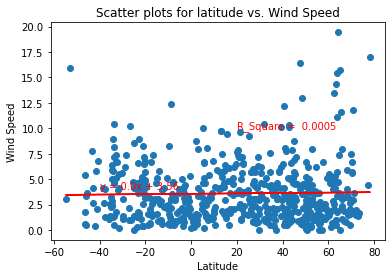

In [27]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
rsquare = (f'R_Square =  {str(round(rvalue**2,4))}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq, xy=(-40,4), color= 'red')
plt.annotate(rsquare, xy = (20,10), color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Scatter plots for latitude vs. Wind Speed')
plt.show()


In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = pd.DataFrame(city_data)
northern_hemi_df = northern_hemi_df.loc[northern_hemi_df['Lat'] >= 0]
northern_hemi_df

# Display sample data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,celestun,20.8667,-90.4000,21.36,85,4,3.90,MX,1675589589
1,polis,35.0367,32.4264,14.90,74,99,4.39,CY,1675589590
4,bethel,41.3712,-73.4140,-0.25,65,0,1.54,US,1675589320
8,ismailia,30.6043,32.2723,18.04,45,0,6.17,EG,1675589597
10,georgetown,5.4112,100.3354,30.97,70,20,5.14,MY,1675589342
...,...,...,...,...,...,...,...,...,...
566,igrim,63.1906,64.4162,-13.03,97,91,0.46,RU,1675590030
567,de-kastri,51.4667,140.7833,-17.87,90,100,1.37,RU,1675590031
568,shieli,44.1667,66.7500,6.84,56,45,7.82,KZ,1675590032
569,high level,58.5169,-117.1360,-13.94,92,75,2.57,CA,1675590032


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data)
southern_hemi_df = southern_hemi_df.loc[southern_hemi_df['Lat'] < 0]
southern_hemi_df

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,hithadhoo,-0.6000,73.0833,27.01,70,96,5.26,MV,1675589591
3,ushuaia,-54.8000,-68.3000,8.81,61,75,3.09,AR,1675589311
5,punta arenas,-53.1500,-70.9167,8.06,71,20,15.95,CL,1675589593
6,banjar,-8.1900,114.9675,25.78,88,100,3.54,ID,1675589594
7,mataura,-46.1927,168.8643,14.57,92,70,1.77,NZ,1675589596
...,...,...,...,...,...,...,...,...,...
547,bulolo,-7.2000,146.6500,22.51,98,100,0.87,PG,1675590013
551,mareeba,-17.0000,145.4333,25.24,95,98,1.34,AU,1675590016
557,kefamenanu,-9.4467,124.4781,23.22,89,100,1.27,ID,1675590020
561,morondava,-20.2833,44.2833,28.77,66,12,3.16,MG,1675590025


###  Temperature vs. Latitude Linear Regression Plot

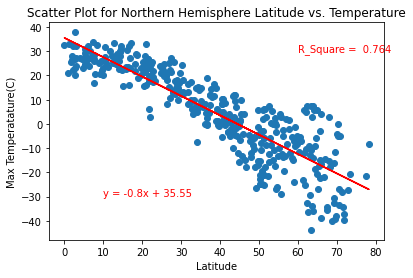

In [32]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

rsquare = (f'R_Square =  {str(round(rvalue**2,4))}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq, xy=(10,-30), color= 'red')
plt.annotate(rsquare, xy = (60,30), color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperatature(C)')
plt.title('Scatter Plot for Northern Hemisphere Latitude vs. Temperature')
plt.show()

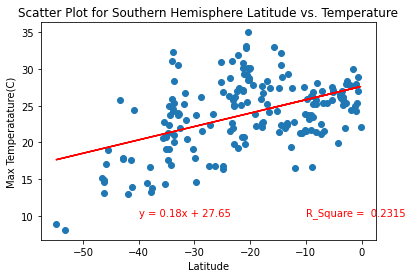

In [34]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

rsquare = (f'R_Square =  {str(round(rvalue**2,4))}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq, xy=(-40,10), color= 'red')
plt.annotate(rsquare, xy = (-10,10), color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperatature(C)')
plt.title('Scatter Plot for Southern Hemisphere Latitude vs. Temperature')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

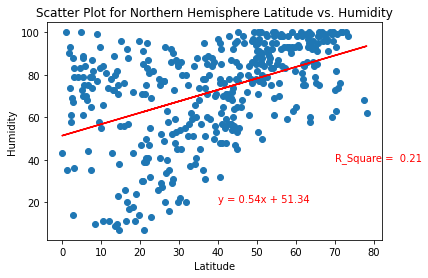

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

rsquare = (f'R_Square =  {str(round(rvalue**2,2))}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq, xy=(40,20), color= 'red')
plt.annotate(rsquare, xy = (70,40), color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Scatter Plot for Northern Hemisphere Latitude vs. Humidity')
plt.show()

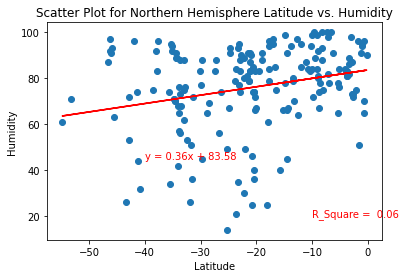

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

rsquare = (f'R_Square =  {str(round(rvalue**2,2))}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq, xy=(-40,45), color= 'red')
plt.annotate(rsquare, xy = (-10,20), color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Scatter Plot for Northern Hemisphere Latitude vs. Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

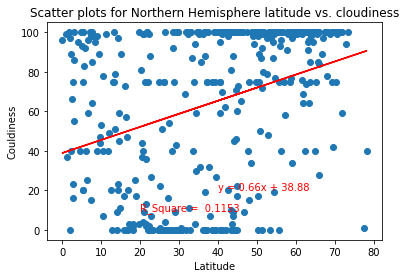

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

rsquare = (f'R_Square =  {str(round(rvalue**2,4))}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq, xy=(40,20), color= 'red')
plt.annotate(rsquare, xy = (20,10), color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Couldiness')
plt.title('Scatter plots for Northern Hemisphere latitude vs. cloudiness')
plt.show()

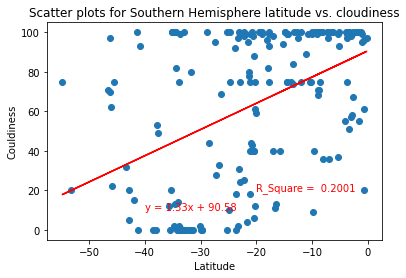

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

rsquare = (f'R_Square =  {str(round(rvalue**2,4))}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq, xy=(-40,10), color= 'red')
plt.annotate(rsquare, xy = (-20,20), color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Couldiness')
plt.title('Scatter plots for Southern Hemisphere latitude vs. cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

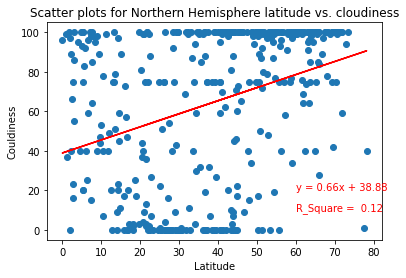

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

rsquare = (f'R_Square =  {str(round(rvalue**2,2))}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq, xy=(60,20), color= 'red')
plt.annotate(rsquare, xy = (60,10), color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Couldiness')
plt.title('Scatter plots for Northern Hemisphere latitude vs. cloudiness')
plt.show()

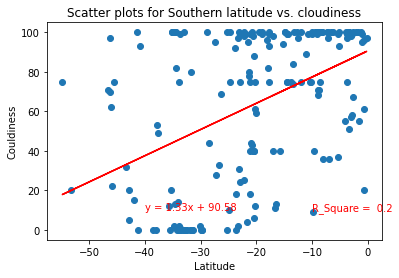

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

rsquare = (f'R_Square =  {str(round(rvalue**2,2))}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq, xy=(-40,10), color= 'red')
plt.annotate(rsquare, xy = (-10,10), color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Couldiness')
plt.title('Scatter plots for Southern latitude vs. cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE